<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/homl_ch10_fashion_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Building an Image Classifier Using the Sequential API**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#fetch dataset mnist

fashion_mnist = keras.datasets.fashion_mnist

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()
assert x_train_full.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train_full.shape == (60000,)
assert y_test.shape == (10000,)



In [ ]:
#create a validation set out of the first 5000 samples

x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


In [ ]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()

In [ ]:
model.compile(
    optimizer='sgd',
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy'
)

In [ ]:
history = model.fit(x_train, y_train, epochs=30,
          validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7350 - accuracy: 0.7556 - val_loss: 0.5533 - val_accuracy: 0.8108
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4918 - accuracy: 0.8282 - val_loss: 0.4640 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4458 - accuracy: 0.8432 - val_loss: 0.4217 - val_accuracy: 0.8570
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4173 - accuracy: 0.8535 - val_loss: 0.4080 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3977 - accuracy: 0.8597 - val_loss: 0.3810 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3817 - accuracy: 0.8641 - val_loss: 0.3774 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3674 - accuracy: 0.8706 - val_loss: 0.3814 - val_accuracy:

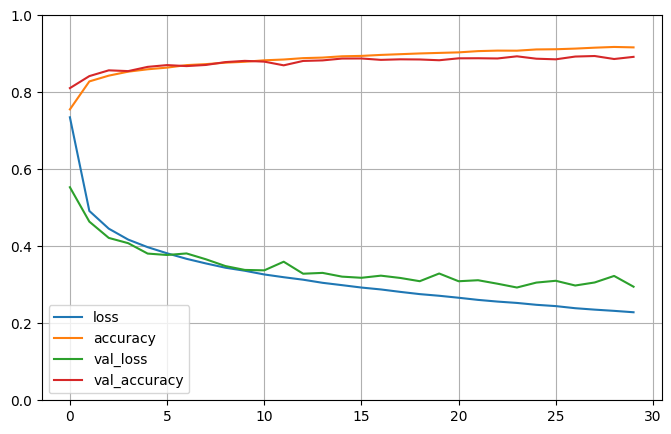

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 59.3927 - accuracy: 0.8526


[59.39268112182617, 0.8525999784469604]

In [ ]:
#predict first 3 test data

x_pred = x_test[:3]
y_proba = model.predict(x_pred)
y_proba.round(2)

1/1 [==============================] - 0s 72ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_proba, axis=1)
y_pred

np.array(class_names)[y_pred]


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

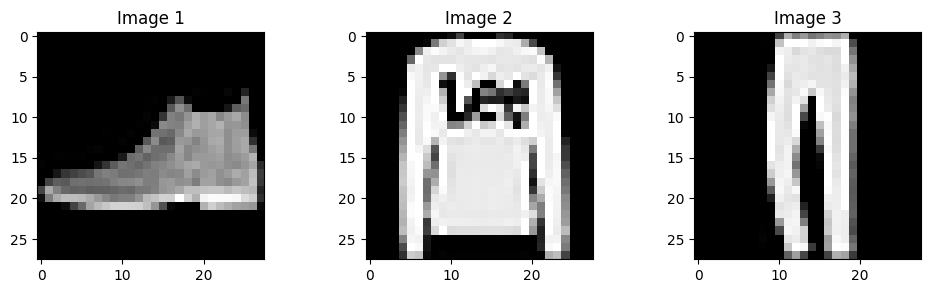

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))

# Iterate through each image and plot it on a subplot
for i in range(3):
    axes[i].imshow(x_pred[i], cmap='gray')
    axes[i].set_title(f'Image {i + 1}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()